### Importar librerias

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Importar datos

In [5]:
data = np.loadtxt("./a.txt", delimiter = ",",dtype="complex", skiprows=0)

In [6]:
type (data)

numpy.ndarray

In [33]:
an=np.angle(data)
np.shape(an)

(720, 720)

### Función de graficar complejos

In [30]:
def ploteo_complejo (mat, indicador, escala):
    if indicador=="I":
        mat=np.abs(mat)**2
    elif indicador=="A":
        mat=np.abs(mat)
    elif indicador=="P":
        mat=np.angle(mat)
    else:
        mat=mat
        
    if escala==1:
        plt.figure()
        plt.imshow(mat)
        plt.show()
    else:
        plt.figure()
        plt.imshow(np.log(mat))
        plt.show()
        
    return 0

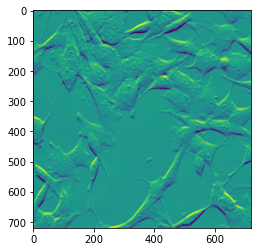

In [31]:
pc=ploteo_complejo(data,"P",1)

### Transformada de Fourier

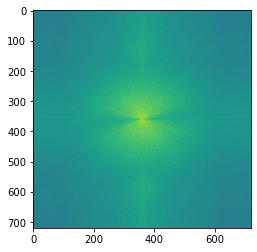

In [42]:
FFT=np.fft.fftn(an)
FFT=np.fft.fftshift(FFT)
FFT=np.abs(FFT)
plt.imshow(np.log(FFT))
plt.show()

### Filtrado

In [93]:
F1=np.arange(-361, 361)
F2=np.arange(-361, 361)
X, Y=np.meshgrid(F1,F2)
D=np.sqrt(X**2+Y**2)
D=D/np.max(D)
Do=0.25
Huv=np.zeros((720,720))
for i in range (720):
    for j in range(720):
        if (D[i,j]<Do):
            Huv[i,j]=1
#plt.imshow(Huv)
#plt.show()

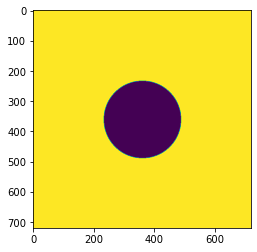

In [94]:
huv=1-Huv
plt.imshow(huv)
plt.show()

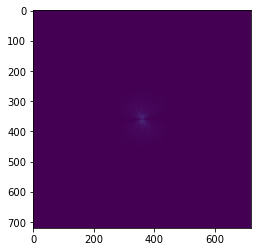

In [95]:
G=Huv*FFT
Ga=np.abs(G)
Ga=np.uint8(255*Ga/np.max(Ga))
plt.imshow(Ga)
plt.show()

### Transformada inversa

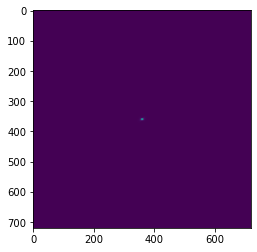

In [98]:
g=np.fft.ifftn(Ga)
g=np.fft.ifftshift(g)
g=np.abs(g)**2
#g=np.uint8(g)
plt.imshow(g)
plt.show()